# Análisis descriptivo: tiempo gastado en redes sociales

## Importación de librerías e importación del Dataframe

In [2]:
import matplotlib as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_excel('dataset.xlsx')
df

,Edad,Género,Estatus de relación,Tiempo en TikTok (horas),Tiempo en Instagram (horas),Tiempo en Twitter (horas),Tiempo en Youtube (horas),Tiempo total en horas,Tiempo de concentración (minutos),Comparación en redes sociales (0-10),Depresión (0-10),Calidad del sueño (0-10),Estrés (0-10),Frecuencia de deporte a la semana
0,23,Hombre,Solter@,2,2,1,1,6,27,10,8,3,10,Nunca
1,20,Hombre,Solter@,2,2,2,1,7,37,10,5,0,9,3 veces o más
2,20,Mujer,En pareja,2,1,1,1,5,31,6,9,3,8,1 o 2 veces
3,19,Hombre,En pareja,1,1,0,0,2,33,9,0,7,6,3 veces o más
4,27,Mujer,En pareja,1,0,0,0,1,40,8,1,10,5,3 veces o más
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17,Mujer,Solter@,3,3,2,2,10,28,10,6,5,10,3 veces o más
196,19,Mujer,En pareja,0,0,0,0,0,39,8,0,9,6,3 veces o más
197,17,Mujer,Solter@,2,2,1,1,6,23,9,10,3,10,Nunca
198,18,Hombre,Solter@,3,2,2,2,9,31,9,5,4,9,3 veces o más


## Exploración de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Edad                                  200 non-null    int64 
 1   Género                                200 non-null    object
 2   Estatus de relación                   200 non-null    object
 3   Tiempo en TikTok (horas)              200 non-null    int64 
 4   Tiempo en Instagram (horas)           200 non-null    int64 
 5   Tiempo en Twitter (horas)             200 non-null    int64 
 6   Tiempo en Youtube (horas)             200 non-null    int64 
 7   Tiempo total en horas                 200 non-null    int64 
 8   Tiempo de concentración (minutos)     200 non-null    int64 
 9   Comparación en redes sociales (0-10)  200 non-null    int64 
 10  Depresión (0-10)                      200 non-null    int64 
 11  Calidad del sueño (0-10)        

In [5]:
pd.unique(df['Género'])

array(['Hombre', 'Mujer'], dtype=object)

In [6]:
pd.unique(df['Estatus de relación'])

array(['Solter@', 'En pareja'], dtype=object)

In [7]:
pd.unique(df['Frecuencia de deporte a la semana'])

array(['Nunca', '3 veces o más', '1 o 2 veces'], dtype=object)

In [8]:
df = df.rename(columns={'Edad': 'edad', 'Género': 'genero', 'Estatus de relación': 'estatus_r', 'Tiempo en TikTok (horas)': 't_tiktok', 'Tiempo en Instagram (horas)': 't_instagram', 'Tiempo en Twitter (horas)': 't_twitter', 'Tiempo en Youtube (horas)': 't_youtube', 'Tiempo total en horas': 'tiempo total', 'Tiempo de concentración (minutos)':'t_concentracion', 'Comparación en redes sociales (0-10)': 'Comparacion_sm', 'Depresión (0-10)': 'depresion', 'Calidad del sueño (0-10)': 'calidad_sueño', 'Estrés (0-10)': 'estres', 'Frecuencia de deporte a la semana': 'Freq_deporte'})

In [9]:
df[df['edad']<20]

,edad,genero,estatus_r,t_tiktok,t_instagram,t_twitter,t_youtube,tiempo total,t_concentracion,Comparacion_sm,depresion,calidad_sueño,estres,Freq_deporte
3,19,Hombre,En pareja,1,1,0,0,2,33,9,0,7,6,3 veces o más
5,15,Hombre,Solter@,2,2,2,2,8,24,7,8,0,8,Nunca
11,15,Hombre,En pareja,1,1,1,1,4,50,9,2,8,9,1 o 2 veces
24,15,Hombre,Solter@,2,1,1,1,5,25,6,5,2,10,Nunca
25,15,Hombre,Solter@,2,2,2,2,8,31,7,7,1,7,Nunca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17,Mujer,Solter@,3,3,2,2,10,28,10,6,5,10,3 veces o más
196,19,Mujer,En pareja,0,0,0,0,0,39,8,0,9,6,3 veces o más
197,17,Mujer,Solter@,2,2,1,1,6,23,9,10,3,10,Nunca
198,18,Hombre,Solter@,3,2,2,2,9,31,9,5,4,9,3 veces o más


In [10]:
condicion =df['edad'].isin([15])
df[condicion]

,edad,genero,estatus_r,t_tiktok,t_instagram,t_twitter,t_youtube,tiempo total,t_concentracion,Comparacion_sm,depresion,calidad_sueño,estres,Freq_deporte
5,15,Hombre,Solter@,2,2,2,2,8,24,7,8,0,8,Nunca
11,15,Hombre,En pareja,1,1,1,1,4,50,9,2,8,9,1 o 2 veces
24,15,Hombre,Solter@,2,1,1,1,5,25,6,5,2,10,Nunca
25,15,Hombre,Solter@,2,2,2,2,8,31,7,7,1,7,Nunca
46,15,Mujer,Solter@,2,1,1,1,5,34,8,6,1,8,Nunca
86,15,Hombre,Solter@,2,2,1,1,6,20,9,9,4,8,Nunca
104,15,Mujer,Solter@,2,2,2,1,7,29,10,9,3,6,3 veces o más
129,15,Hombre,Solter@,2,2,2,2,8,20,6,10,4,9,Nunca
149,15,Hombre,Solter@,2,2,1,1,6,35,10,6,1,6,Nunca
153,15,Mujer,Solter@,2,2,1,1,6,33,7,7,5,9,Nunca


## Limpieza de datos

In [11]:
df.isnull()

,edad,genero,estatus_r,t_tiktok,t_instagram,t_twitter,t_youtube,tiempo total,t_concentracion,Comparacion_sm,depresion,calidad_sueño,estres,Freq_deporte
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.dropna(inplace=True)

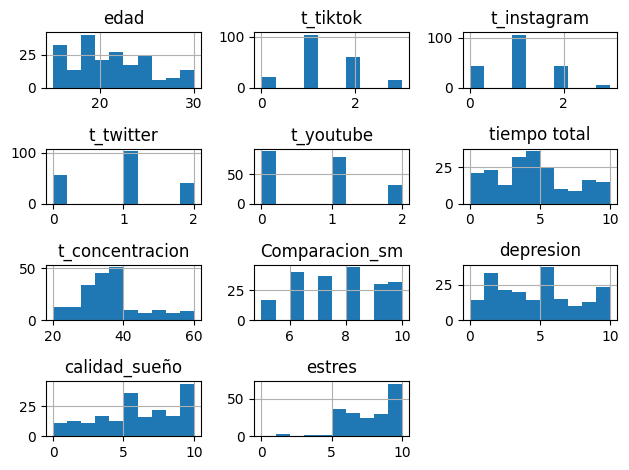

In [13]:
df.hist()
plt.tight_layout() 

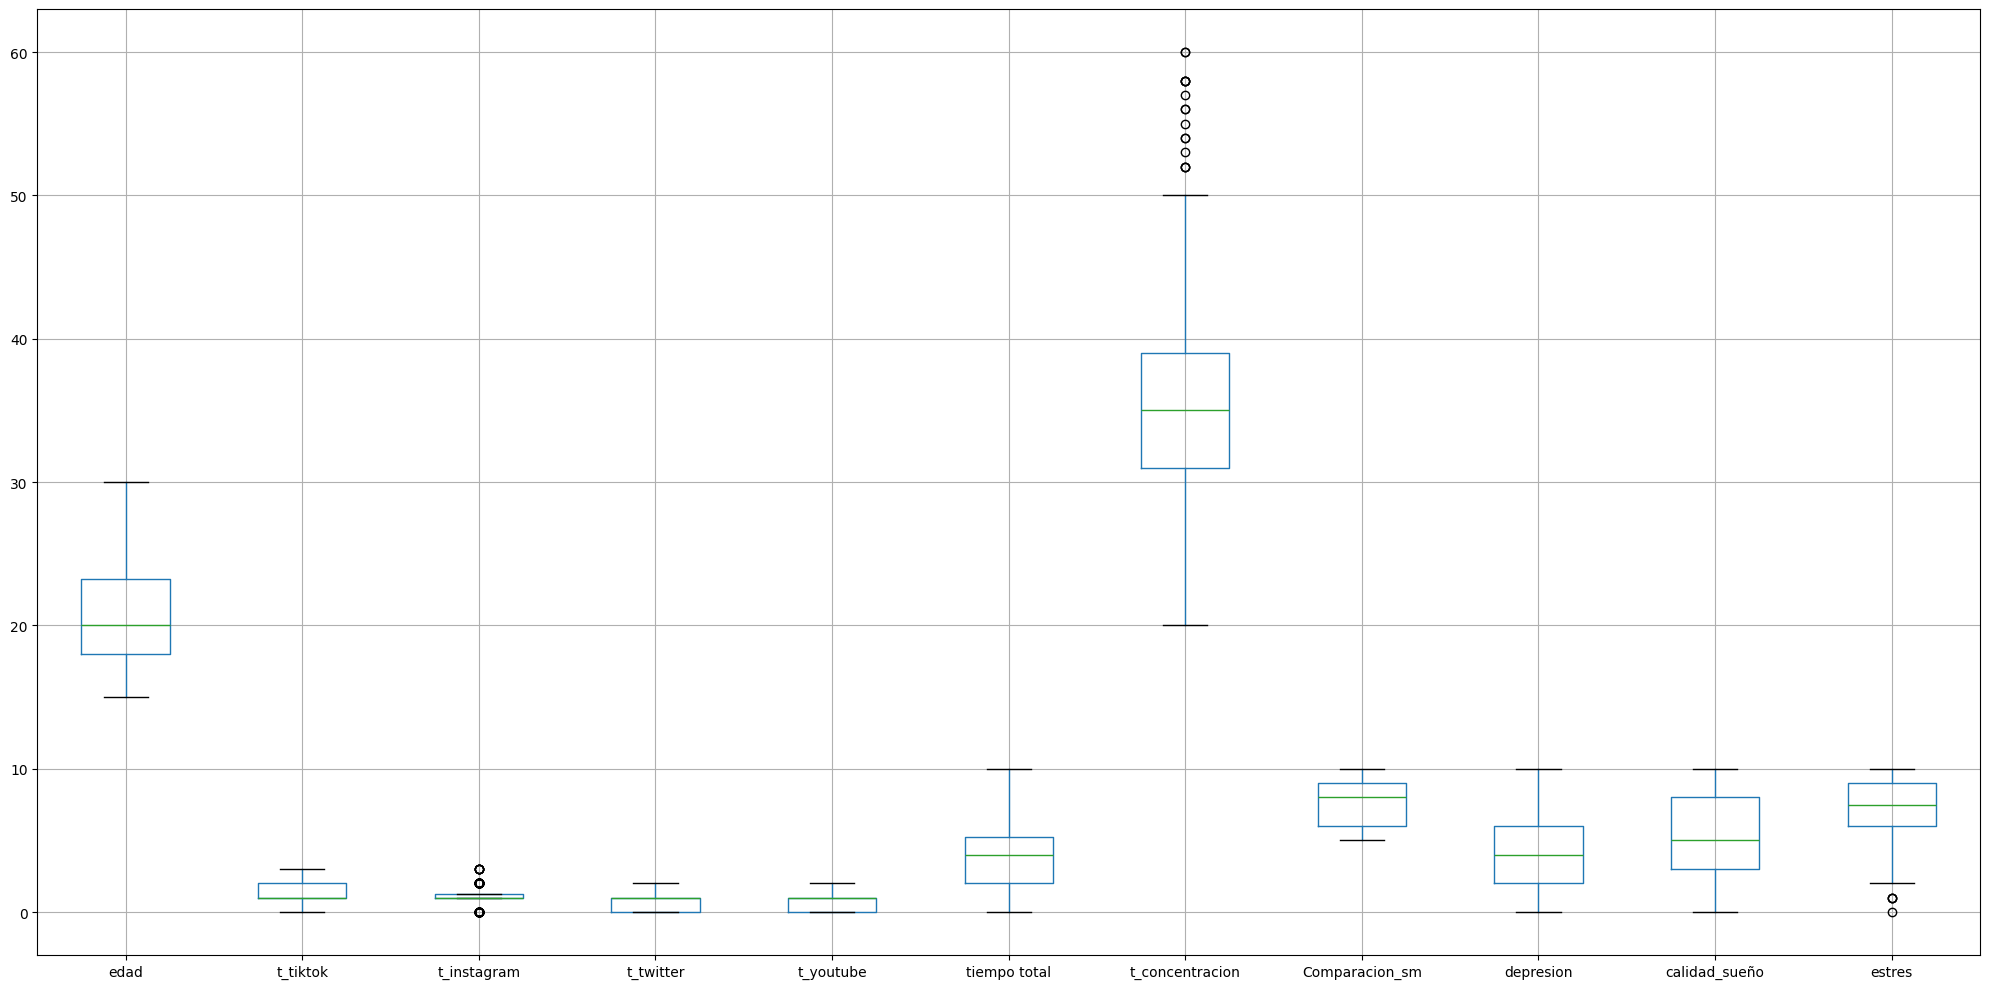

In [14]:
df.boxplot(figsize=(20,10))
plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x13f307a70>,
 'caps': [<matplotlib.lines.Line2D at 0x13f33c080>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f307890>],
 'medians': [<matplotlib.lines.Line2D at 0x13f33c5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13f33c800>],
 'means': []}

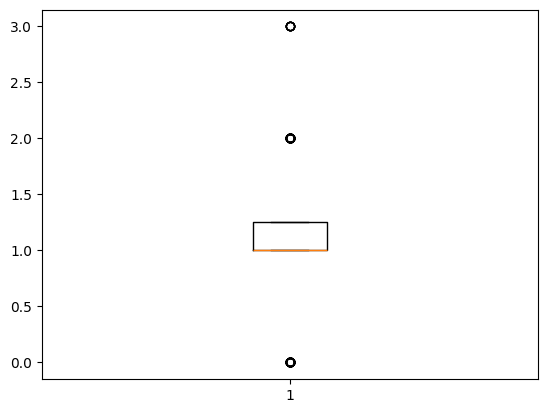

In [15]:
plt.boxplot(df['t_instagram'])

Valores con outliers: \
    t_instagram, t_concentracion, estres \
*Aunque son valores atípicos, no se pueden eliminar, porque no son datos erróneos*

## Análisis

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,200.0,20.850,4.008471,15.0,18.0,20.0,23.25,30.0
t_tiktok,200.0,1.345,0.767411,0.0,1.0,1.0,2.00,3.0
t_instagram,200.0,1.060,0.747794,0.0,1.0,1.0,1.25,3.0
t_twitter,200.0,0.915,0.692947,0.0,0.0,1.0,1.00,2.0
t_youtube,200.0,0.710,0.720064,0.0,0.0,1.0,1.00,2.0
tiempo total,200.0,4.030,2.717725,0.0,2.0,4.0,5.25,10.0
t_concentracion,200.0,36.065,8.720148,20.0,31.0,35.0,39.00,60.0
Comparacion_sm,200.0,7.630,1.554084,5.0,6.0,8.0,9.00,10.0
depresion,200.0,4.270,2.885956,0.0,2.0,4.0,6.00,10.0
calidad_sueño,200.0,5.605,2.956804,0.0,3.0,5.0,8.00,10.0


In [17]:
df.describe(include='object').T

,count,unique,top,freq
genero,200,2,Mujer,114
estatus_r,200,2,En pareja,123
Freq_deporte,200,3,Nunca,83


### Medidas de dispersión

In [18]:
#rango
num_columnas_num = df.select_dtypes(include=np.number).columns.tolist()
for column in num_columnas_num:
    rango = df[column].max() - df[column].min()
    print(column, ':', rango)


edad : 15
t_tiktok : 3
t_instagram : 3
t_twitter : 2
t_youtube : 2
tiempo total : 10
t_concentracion : 40
Comparacion_sm : 5
depresion : 10
calidad_sueño : 10
estres : 10


In [19]:
#Varianza
df[['edad', 't_tiktok', 't_instagram', 't_twitter', 't_youtube', 'tiempo total', 't_concentracion', 'Comparacion_sm', 'depresion', 'calidad_sueño', 'estres']].var()

edad               16.067839
t_tiktok            0.588920
t_instagram         0.559196
t_twitter           0.480176
t_youtube           0.518492
tiempo total        7.386030
t_concentracion    76.040980
Comparacion_sm      2.415176
depresion           8.328744
calidad_sueño       8.742688
estres              4.420075
dtype: float64

In [20]:
#Desviación estándar
df[['edad', 't_tiktok', 't_instagram', 't_twitter', 't_youtube', 'tiempo total', 't_concentracion', 'Comparacion_sm', 'depresion', 'calidad_sueño', 'estres']].std()

edad               4.008471
t_tiktok           0.767411
t_instagram        0.747794
t_twitter          0.692947
t_youtube          0.720064
tiempo total       2.717725
t_concentracion    8.720148
Comparacion_sm     1.554084
depresion          2.885956
calidad_sueño      2.956804
estres             2.102398
dtype: float64

### Análisis univariable

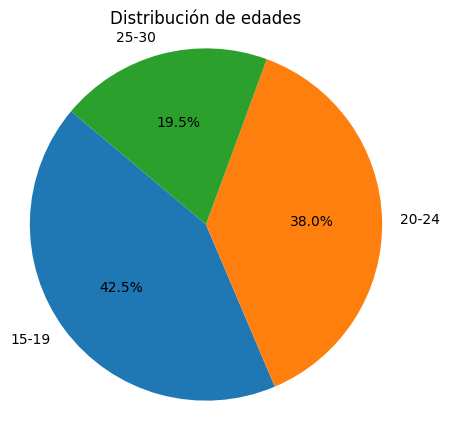

In [21]:
intervalos_edad = [(15, 19), (20, 24), (25, 30)]

distribucion_edades = [((df['edad'] >= inicio) & (df['edad'] <= fin)).sum() for inicio, fin in intervalos]

etiquetas = [f'{inicio}-{fin}' for inicio, fin in intervalos]

plt.figure(figsize=(5,5))
plt.pie(distribucion_edades, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de edades')
plt.axis('equal')
plt.show()

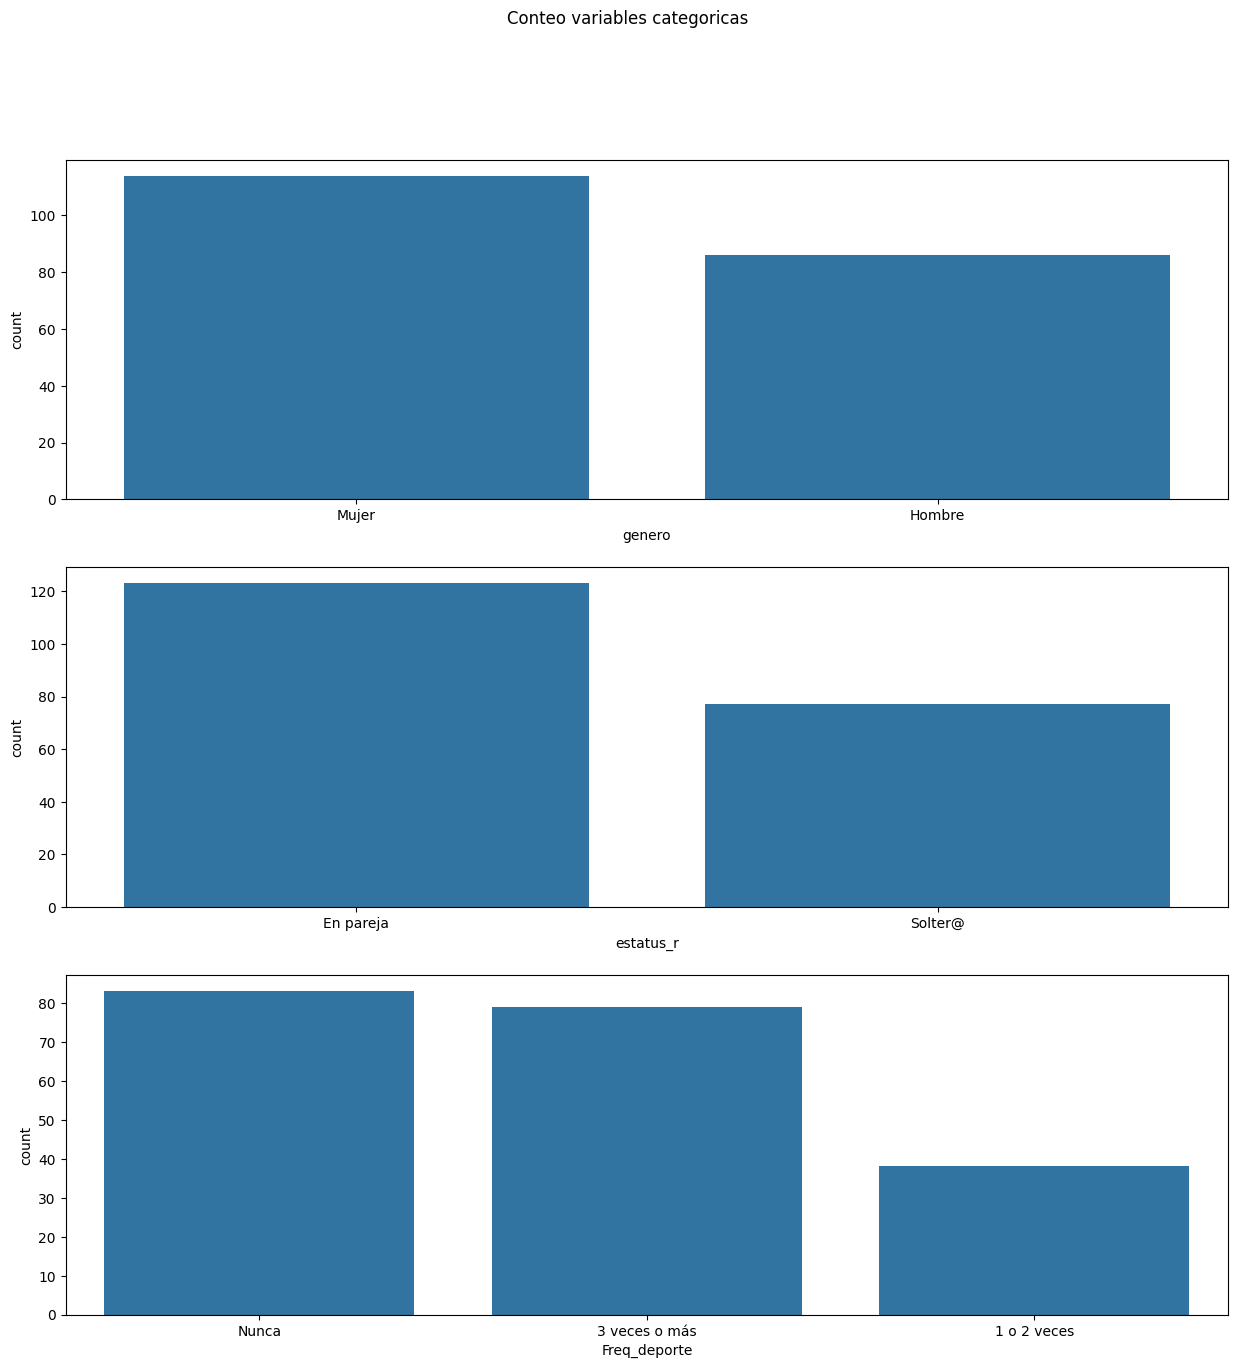

In [22]:
fig, axes = plt.subplots(3, figsize=(15,15))
fig.suptitle('Conteo variables categoricas')
sns.countplot(ax=axes[0], data=df, x='genero', order=df['genero'].value_counts().index)
sns.countplot(ax=axes[1], data=df, x='estatus_r', order=df['estatus_r'].value_counts().index)
sns.countplot(ax=axes[2], data=df, x='Freq_deporte', order=df['Freq_deporte'].value_counts().index)
plt.show()

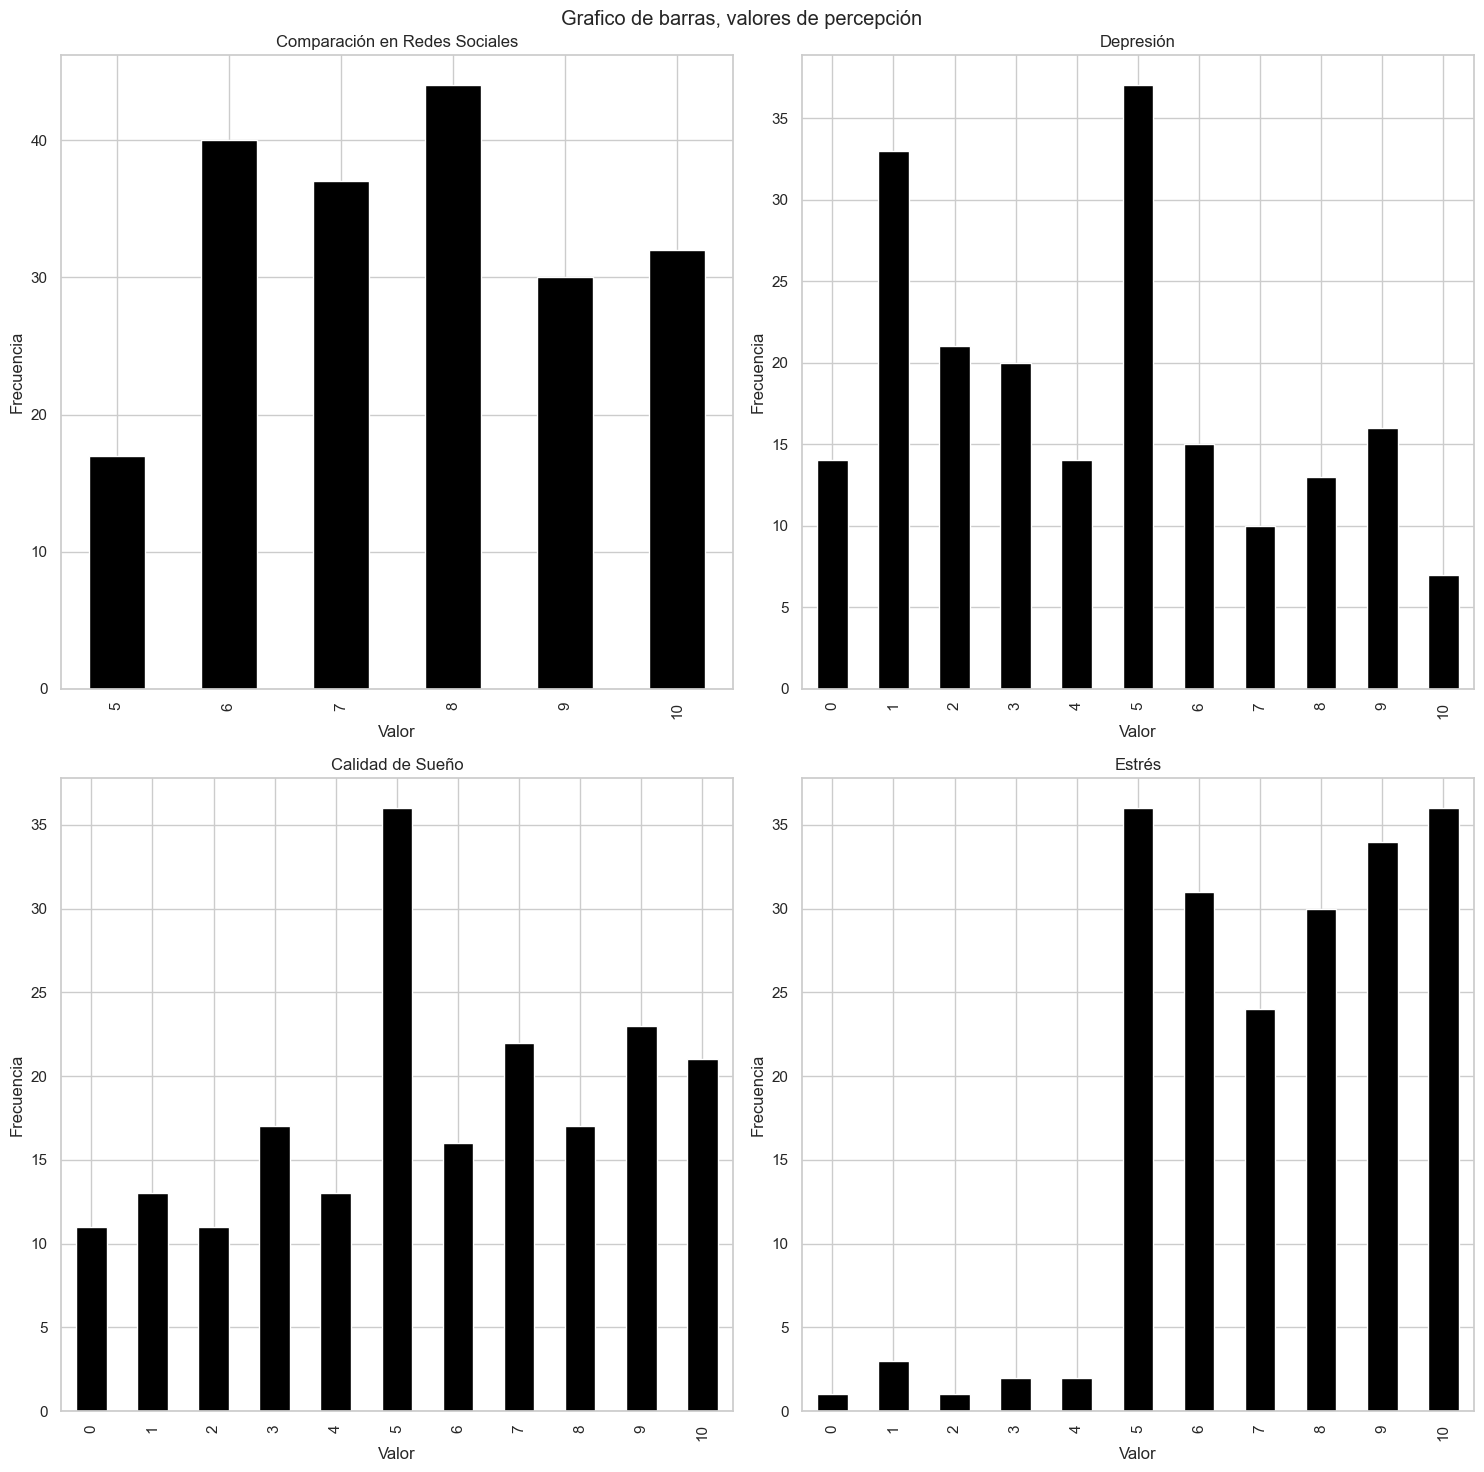

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Grafico de barras, valores de percepción')
df['Comparacion_sm'].value_counts().sort_index().plot(kind='bar', ax=ax[0, 0], color='black')
ax[0, 0].set_title('Comparación en Redes Sociales')
ax[0, 0].set_xlabel('Valor')
ax[0, 0].set_ylabel('Frecuencia')

df['depresion'].value_counts().sort_index().plot(kind='bar', ax=ax[0, 1], color='black')
ax[0, 1].set_title('Depresión')
ax[0, 1].set_xlabel('Valor')
ax[0, 1].set_ylabel('Frecuencia')
df['calidad_sueño'].value_counts().sort_index().plot(kind='bar', ax=ax[1, 0], color='black')
ax[1, 0].set_title('Calidad de Sueño')
ax[1, 0].set_xlabel('Valor')
ax[1, 0].set_ylabel('Frecuencia')
df['estres'].value_counts().sort_index().plot(kind='bar', ax=ax[1, 1], color='black')
ax[1, 1].set_title('Estrés')
ax[1, 1].set_xlabel('Valor')
ax[1, 1].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

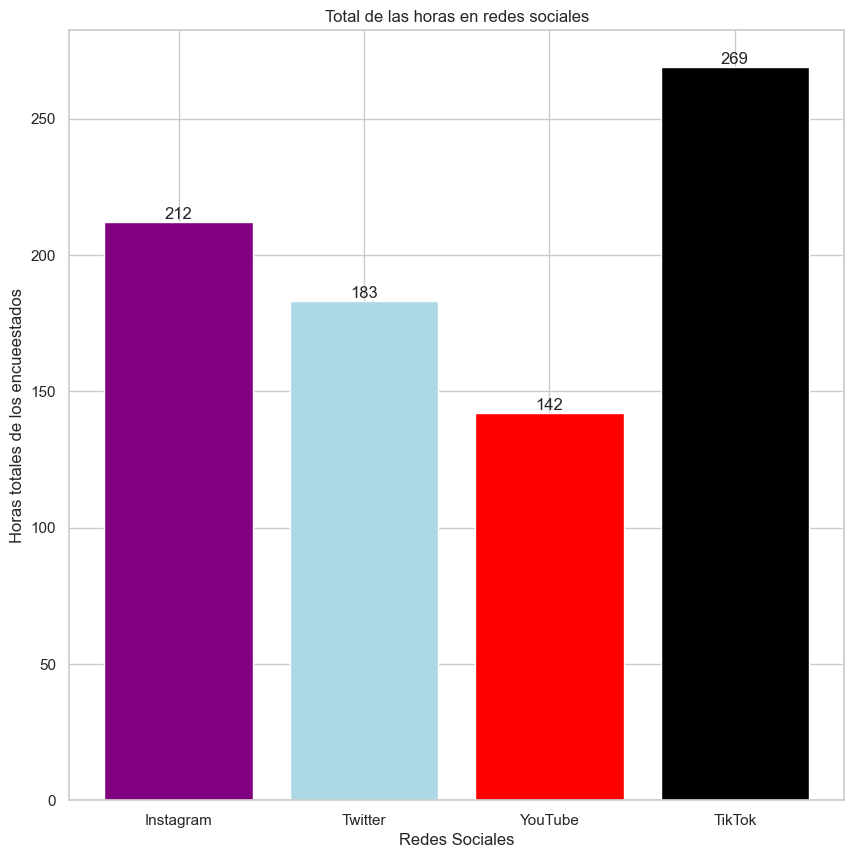

In [ ]:
total_instagram = df['t_instagram'].sum()
total_tiktok = df['t_tiktok'].sum()
total_twitter = df['t_twitter'].sum()
total_youtube = df['t_youtube'].sum()

plt.figure(figsize=(10, 10))
redes_sociales = ['Instagram', 'Twitter', 'YouTube', 'TikTok']
totales = [total_instagram, total_twitter, total_youtube, total_tiktok]
barras = plt.bar(redes_sociales, totales, color=['purple', 'lightblue', 'red', 'black'])

for bar, total in zip(barras, totales):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total), ha='center', va='bottom')

plt.xlabel('Redes Sociales')
plt.ylabel('Horas totales de los encueestados')
plt.title('Total de las horas en redes sociales')
plt.show()

### Correlación

In [ ]:
#Creación de dos columnas numéricas con diccionarios
freq_deporte_num = {'Nunca': 0, '3 veces o más': 5, '1 o 2 veces': 2.5}
estatus_relacion_num = {'Solter@': 0, 'En pareja': 1}
['Solter@', 'En pareja']
#Adición de las nuevas columnas al df

df['freq_deporte_num'] = df['Freq_deporte'].map(freq_deporte_num)
df['estatus_relacion_num'] = df['estatus_r'].map(estatus_relacion_num)
df

,edad,genero,estatus_r,t_tiktok,t_instagram,t_twitter,t_youtube,tiempo total,t_concentracion,Comparacion_sm,depresion,calidad_sueño,estres,Freq_deporte,freq_deporte_num,estatus_relacion_num
0,23,Hombre,Solter@,2,2,1,1,6,27,10,8,3,10,Nunca,0.0,0
1,20,Hombre,Solter@,2,2,2,1,7,37,10,5,0,9,3 veces o más,2.5,0
2,20,Mujer,En pareja,2,1,1,1,5,31,6,9,3,8,1 o 2 veces,5.0,1
3,19,Hombre,En pareja,1,1,0,0,2,33,9,0,7,6,3 veces o más,2.5,1
4,27,Mujer,En pareja,1,0,0,0,1,40,8,1,10,5,3 veces o más,2.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17,Mujer,Solter@,3,3,2,2,10,28,10,6,5,10,3 veces o más,2.5,0
196,19,Mujer,En pareja,0,0,0,0,0,39,8,0,9,6,3 veces o más,2.5,1
197,17,Mujer,Solter@,2,2,1,1,6,23,9,10,3,10,Nunca,0.0,0
198,18,Hombre,Solter@,3,2,2,2,9,31,9,5,4,9,3 veces o más,2.5,0


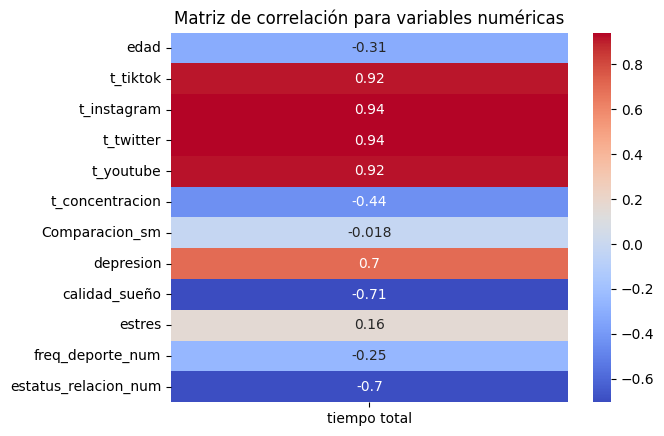

In [ ]:
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns
df_numerica = df[columnas_numericas]
correlacion_tiempo_total = df_numerica.corr()['tiempo total'].drop('tiempo total')
sns.heatmap(correlacion_tiempo_total.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()


- Cuando el tiempo total en redes sociales aumenta, la depresión también aumenta proporcionalmente. 
- Cuando el tiempo total aumenta, la calidad de sueño, la concentración, la frecuencia de deporte, la edad de las personas y las personas con pareja disminuyen. 
- Las variables como la comparacion en redes sociales y el estrés no tiene una correlación muy grande con el tiempo total en redes sociales.

In [ ]:
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns
df_numerica = df[columnas_numericas]
sns.heatmap(columnas_numericas.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()